In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import pickle

In [33]:
#load city overall model
model_total_city = pickle.load(open("model_total_city.sav", 'rb'))
model_total_city_scaler = pickle.load(open("model_total_city_scaler.sav", 'rb'))

In [34]:
# default df

(400.0, 1955.6219337728157)

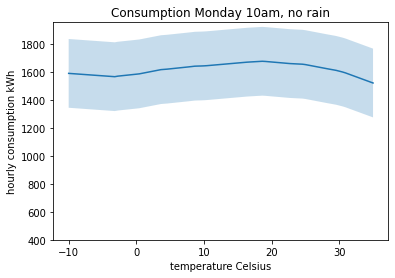

In [74]:
#temp
#["max_temp","min_temp","precip","hour","weekday","day_of_week"]
temperature = pd.DataFrame()
temperature["max_temp"] = np.linspace(-10,35,100)
temperature["min_temp"] = np.linspace(-10,35,100)
temperature["precip"] = np.full((100,1),0)
temperature["hour"] = np.full((100,1),10)
temperature["weekday"] = np.full((100,1),1)
temperature["day_of_week"] = np.full((100,1),1)

X = model_total_city_scaler.transform(temperature)
predictions = model_total_city.predict(X)

ax = sns.lineplot(
    x = temperature["max_temp"],
    y = predictions
)
plt.fill_between(x=temperature["max_temp"],
                 y1=predictions - 246,
                 y2=predictions + 246,
                 alpha=0.25
                )
plt.xlabel("temperature Celsius")
plt.ylabel("hourly consumption kWh")
plt.title("Consumption Monday 10am, no rain")
plt.ylim(ymin=400)


Text(0.5, 1.0, 'Consumption Monday 10am, 10 ℃')

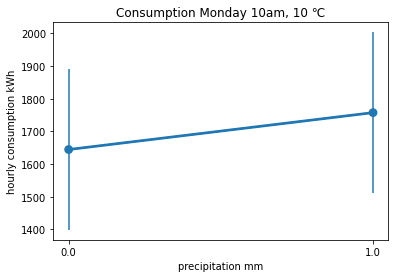

In [75]:
#precipitation
precipitation = pd.DataFrame()
precipitation["max_temp"] = pd.Series([10,10])
precipitation["min_temp"] = np.full((2,1),10)
precipitation["precip"] = np.linspace(0,1,2)
precipitation["hour"] = np.full((2,1),10)
precipitation["weekday"] = np.full((2,1),1)
precipitation["day_of_week"] = np.full((2,1),1)

X = model_total_city_scaler.transform(precipitation)
predictions = model_total_city.predict(X)

ax = sns.pointplot(
    x = precipitation["precip"],
    y = predictions
)
ax.errorbar(x = precipitation["precip"],y = predictions,yerr = 246)
plt.xlabel("precipitation mm")
plt.ylabel("hourly consumption kWh")
plt.title("Consumption Monday 10am, 10 ℃")

Text(0.5, 1.0, 'Consumption Monday 10℃, no rain')

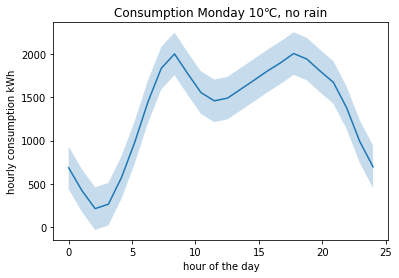

In [76]:
#time of day
time_of_day = pd.DataFrame()
time_of_day["max_temp"] = np.linspace(10,10,24)
time_of_day["min_temp"] = np.linspace(10,10,24)
time_of_day["precip"] = np.linspace(0,0,24)
time_of_day["hour"] = np.linspace(0,24,24)
time_of_day["weekday"] = np.full((24,1),1)
time_of_day["day_of_week"] = np.full((24,1),1)

X = model_total_city_scaler.transform(time_of_day)
predictions = model_total_city.predict(X)

ax = sns.lineplot(
    x = time_of_day["hour"],
    y = predictions
)
plt.fill_between(x=time_of_day["hour"],
                 y1=predictions - 246,
                 y2=predictions + 246,
                 alpha=0.25
                )
plt.xlabel("hour of the day")
plt.ylabel("hourly consumption kWh")
plt.title("Consumption Monday 10℃, no rain")

Text(0.5, 1.0, 'Consumption 10am, 10℃, no rain')

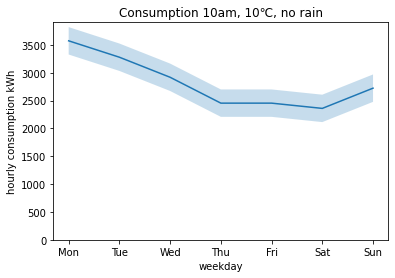

In [78]:
#weekday
weekday = pd.DataFrame()
weekday["max_temp"] = np.linspace(10,10,7)
weekday["min_temp"] = np.full((7,1),10)
weekday["precip"] = np.linspace(0,0,7)
weekday["hour"] = np.full((7,1),10)
weekday["weekday"] = pd.Series([0, 0, 0, 0, 0, 1, 1])
weekday["day_of_week"] = pd.Series([0, 1, 2, 3, 4, 5, 6])

X = model_total_city_scaler.transform(weekday)
predictions = model_total_city.predict(X)

ax = plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], predictions)

plt.fill_between(x=[0, 1, 2, 3, 4, 5, 6],
                 y1=predictions - 246,
                 y2=predictions + 246,
                 alpha=0.25
                )
plt.xlabel("weekday")
plt.ylabel("hourly consumption kWh")
plt.ylim(ymin=0)
plt.title("Consumption 10am, 10℃, no rain")

Text(0.5, 1.0, 'Consumption Monday 10℃, no rain')

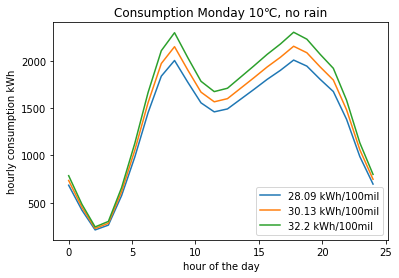

In [82]:
#time of day
comparison = pd.DataFrame()
comparison["max_temp"] = np.linspace(10,10,24)
comparison["min_temp"] = np.linspace(10,10,24)
comparison["precip"] = np.linspace(0,0,24)
comparison["hour"] = np.linspace(0,24,24)
comparison["weekday"] = np.full((24,1),1)
comparison["day_of_week"] = np.full((24,1),1)

X = model_total_city_scaler.transform(comparison)
predictions = model_total_city.predict(X)

ax = sns.lineplot(
    x = comparison["hour"],
    y = predictions,
    label = "28.09 kWh/100mil"
)
ax = sns.lineplot(
    x = comparison["hour"],
    y = predictions*(30.13/28.09),
    label = "30.13 kWh/100mil"
)
ax = sns.lineplot(
    x = comparison["hour"],
    y = predictions*(32.2/28.09),
    label = "32.2 kWh/100mil"
)
plt.xlabel("hour of the day")
plt.ylabel("hourly consumption kWh")
plt.title("Consumption Monday 10℃, no rain")

In [86]:
(predictions.max()*(32.2/28.09) - predictions.max())/predictions.max()

0.14631541473834123